In [2]:
#Control difuso
#Encontrar el valor de la propina a partir de la calidad del servicio
# de la comida en un restaurante
#librerias
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt 

#Generar variables del universo
#calidad y servicio en rangos subjetivos [0,10]
#la propina tiene un rango [0,25] en unidades de puntos porcentuales
x_calidad = np.arange(0,11,1)
x_servicio = np.arange(0,11,1)
x_propina = np.arange(0,26,1)


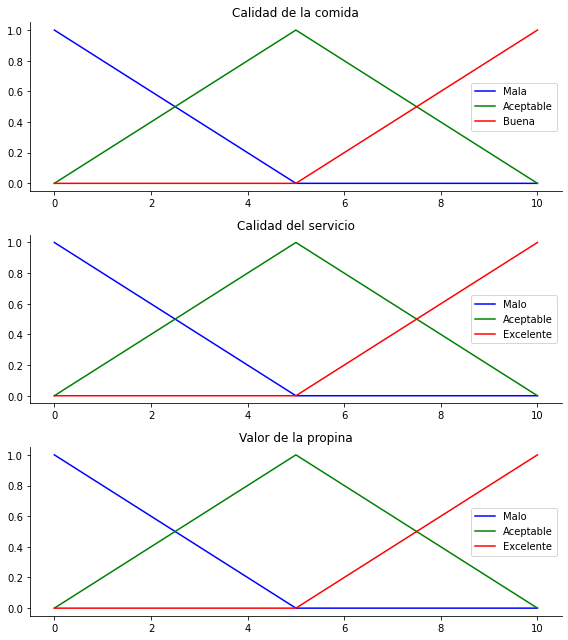

In [3]:
#Generar funciones de pertenencias difusas 
calidad_baja = fuzz.trimf(x_calidad,[0,0,5])
calidad_media = fuzz.trimf(x_calidad,[0,5,10])
calidad_alta = fuzz.trimf(x_calidad,[5,10,10])
servicio_bajo = fuzz.trimf(x_servicio,[0,0,5])
servicio_medio = fuzz.trimf(x_servicio,[0,5,10])
servicio_alto = fuzz.trimf(x_servicio,[5,10,10])
propina_baja = fuzz.trimf(x_propina,[0,0,13])
propina_media = fuzz.trimf(x_propina,[0,13,25])
propina_alta = fuzz.trimf(x_propina,[13,25,25])

#visualizar estos universos y funciones de pertenencia 
fig,(ax0,ax1,ax2)=plt.subplots(nrows=3,figsize=(8,9))
ax0.plot(x_calidad,calidad_baja,'b',linewidth=1.5,label='Mala')
ax0.plot(x_calidad,calidad_media,'g',linewidth=1.5,label='Aceptable')
ax0.plot(x_calidad,calidad_alta,'r',linewidth=1.5,label='Buena')
ax0.set_title('Calidad de la comida')
ax0.legend()

ax1.plot(x_servicio,servicio_bajo,'b',linewidth=1.5,label='Malo')
ax1.plot(x_servicio,servicio_medio,'g',linewidth=1.5,label='Aceptable')
ax1.plot(x_servicio,servicio_alto,'r',linewidth=1.5,label='Excelente')
ax1.set_title('Calidad del servicio')
ax1.legend()

ax2.plot(x_servicio,servicio_bajo,'b',linewidth=1.5,label='Malo')
ax2.plot(x_servicio,servicio_medio,'g',linewidth=1.5,label='Aceptable')
ax2.plot(x_servicio,servicio_alto,'r',linewidth=1.5,label='Excelente')
ax2.set_title('Valor de la propina')
ax2.legend()

for ax in (ax0,ax1,ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

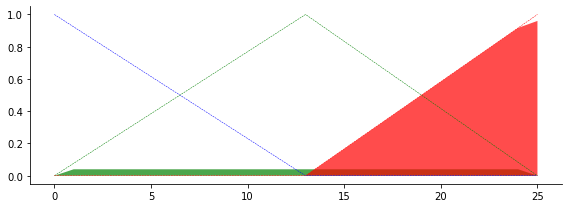

In [4]:

#Necesitamos la activacion de nuestras funciones de pertenencia difusa
#en estos valores
#Los valores exactos 6.5 y 9.8 no existen en nuestro universo
#Para eso existe fuzz.interp_membership

nivel_calidad_bajo= fuzz.interp_membership(x_calidad,calidad_baja,6.5)
nivel_calidad_medio= fuzz.interp_membership(x_calidad,calidad_media,6.5)
nivel_calidad_alto= fuzz.interp_membership(x_calidad,calidad_alta,6.5)

nivel_servicio_bajo= fuzz.interp_membership(x_servicio,servicio_bajo,9.8)
nivel_servicio_medio= fuzz.interp_membership(x_servicio,servicio_medio,9.8)
nivel_servicio_alto= fuzz.interp_membership(x_servicio,servicio_alto,9.8)

#Ahora tomamos nuestras reglas y las aplicamos. la regla 1 se refiere  a la mala comida o servicio
#El operador OR significa que tomamos el maximo de estos dos
activar_regla1 = np.fmax(nivel_calidad_bajo, nivel_servicio_bajo)

#Ahora aplicamos estor ecortando la parte superior de la salida correspondeindte
#funcion de membresía con np.fmin

activacion_propina_baja = np.fmin(activar_regla1,propina_baja)
#eliminado por completo a  0

#para la regla 2, conectamos un servicio aceptable con una propina media
activacion_propina_media = np.fmin(nivel_servicio_medio,propina_media)

#para la regla 3, conectamos servicio bueno 
activar_regla3 = np.fmax(nivel_calidad_alto,nivel_servicio_alto)
activacion_propina_alta=np.fmin(activar_regla3,propina_alta)
propina0=np.zeros_like(x_propina)
#Visualizar lo anterior
fig,ax0=plt.subplots(figsize=(8,3))
ax0.fill_between(x_propina,propina0,activacion_propina_baja,facecolor='b',alpha=0.7)
ax0.plot(x_propina,propina_baja,'b',linewidth=0.5,linestyle='--')
ax0.fill_between(x_propina,propina0,activacion_propina_media,facecolor='g',alpha=0.7)
ax0.plot(x_propina,propina_media,'g',linewidth=0.5,linestyle='--')
ax0.fill_between(x_propina,propina0,activacion_propina_alta,facecolor='r',alpha=0.7)
ax0.plot(x_propina,propina_alta,'r',linewidth=0.5,linestyle='--')

#Cancelar los eje superior/derecho
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

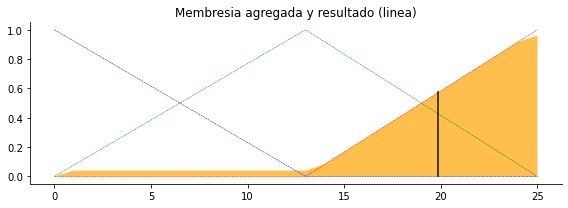

In [5]:
#Agregar las tres funciones de pertenencia de salida juntas
agregado = np.fmax(activacion_propina_baja,np.fmax(activacion_propina_media,activacion_propina_alta))
#Calcular el resultado difuso
propina = fuzz.defuzz(x_propina,agregado,'centroid')
activacion_propina=fuzz.interp_membership(x_propina,agregado,propina)
fig,ax0= plt.subplots(figsize=(8,3))
ax0.plot(x_propina,propina_baja,'b',linewidth=0.5,linestyle='--')
ax0.plot(x_propina,propina_media,'g',linewidth=0.5,linestyle='--')
ax0.plot(x_propina,propina_alta,'r',linewidth=0.5,linestyle='--')
ax0.fill_between(x_propina,propina0,agregado,facecolor='Orange',alpha=0.7)
ax0.plot([propina,propina],[0,activacion_propina],'k',linewidth=1.5,alpha=0.9)
ax0.set_title('Membresia agregada y resultado (linea)')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()
